In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [83]:
df = pd.read_csv("../csv/city_pov_2016_mn.csv")

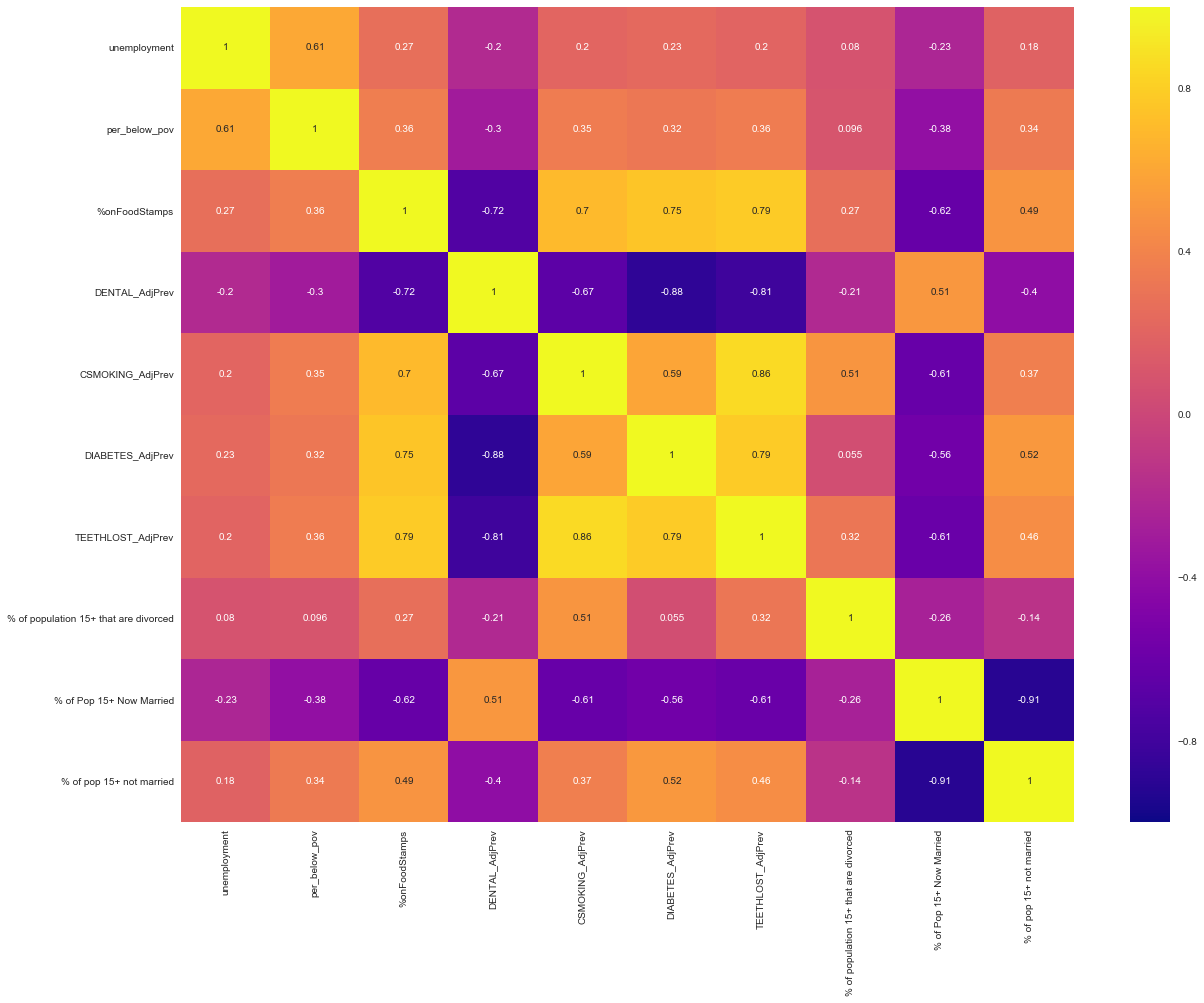

In [84]:
plt.subplots(figsize=(20, 15))
ax = plt.axes()
corr = df.corr()

sns.heatmap(corr,
            annot=True,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
          cmap = plt.cm.plasma)

In [85]:
df.isnull().sum()

GEO.display-label                        0
unemployment                             0
per_below_pov                            0
%onFoodStamps                            0
DENTAL_AdjPrev                           0
CSMOKING_AdjPrev                         0
DIABETES_AdjPrev                         0
TEETHLOST_AdjPrev                        0
% of population 15+ that are divorced    0
% of Pop 15+ Now Married                 0
% of pop 15+ not married                 0
dtype: int64

In [86]:
df.columns

Index(['GEO.display-label', 'unemployment', 'per_below_pov', '%onFoodStamps',
       'DENTAL_AdjPrev', 'CSMOKING_AdjPrev', 'DIABETES_AdjPrev',
       'TEETHLOST_AdjPrev', '% of population 15+ that are divorced',
       '% of Pop 15+ Now Married', '% of pop 15+ not married'],
      dtype='object')

Multivariate Regression
=============

In [87]:
X1 = df[[
    'unemployment',  
    '%onFoodStamps',
    'DENTAL_AdjPrev', 
    'CSMOKING_AdjPrev', 
    'DIABETES_AdjPrev',
    'TEETHLOST_AdjPrev', 
    '% of population 15+ that are divorced',
    '% of Pop 15+ Now Married', '% of pop 15+ not married'
]]

y1 = df['per_below_pov']

In [88]:
y1 = y1.values.reshape(-1, 1)

In [89]:
X1.shape

(492, 9)

In [90]:
y1.shape

(492, 1)

In [91]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

In [92]:
X1_scaler = StandardScaler().fit(X1_train)
y1_scaler = StandardScaler().fit(y1_train)

In [93]:
X1_train_scaled = X1_scaler.transform(X1_train)
X1_test_scaled = X1_scaler.transform(X1_test)
y1_train_scaled = y1_scaler.transform(y1_train)
y1_test_scaled = y1_scaler.transform(y1_test)

In [94]:
mlr = LinearRegression()
mlr.fit(X1_train_scaled, y1_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

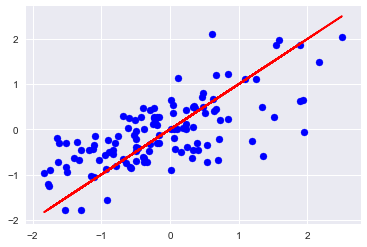

In [95]:
predictions1 = mlr.predict(X1_test_scaled)
plt.plot(y1_test_scaled, y1_test_scaled, c='red')
plt.scatter(y1_test_scaled, predictions, c='blue')
plt.show()

In [96]:
mlr.score(X1_test_scaled, y1_test_scaled)

0.47780917191127137

In [97]:
MSE = mean_squared_error(y1_test_scaled, predictions1)
r2 = mlr.score(X1_test_scaled, y1_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.45520346168935977, R2: 0.47780917191127137


Regression: Pov v. Divorced Pop
===================

In [98]:
X2 = df['% of population 15+ that are divorced'].values.reshape(-1, 1)
y2 = df['per_below_pov'].values.reshape(-1, 1)
print("Shape: ", X2.shape, y2.shape)

Shape:  (492, 1) (492, 1)


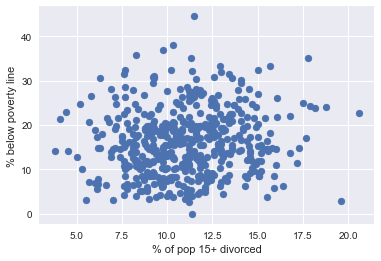

In [99]:
plt.scatter(X2, y2)
plt.xlabel("% of pop 15+ divorced")
plt.ylabel("% below poverty line")

In [100]:
lr = LinearRegression()
lr.fit(X2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
x2_min = np.array([[X2.min()]])
x2_max = np.array([[X2.max()]])
print(f"Min X Value: {x2_min}")
print(f"Max X Value: {x2_max}")

Min X Value: [[3.8]]
Max X Value: [[20.6]]


In [102]:
y2_min = lr.predict(x2_min)
y2_max = lr.predict(x2_max)

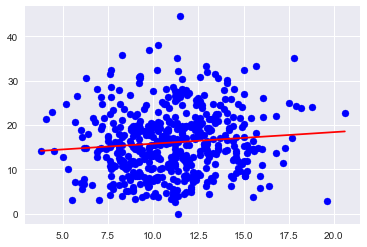

In [103]:
plt.scatter(X2, y2, c='blue')
plt.plot([x2_min[0], x2_max[0]], [y2_min[0], y2_max[0]], c='red')

Scaled Regression

In [104]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

In [105]:
lr.score(X2_test, y2_test)

0.0019033189215242885

In [106]:
X2_scaler = StandardScaler().fit(X2_train)
y2_scaler = StandardScaler().fit(y2_train)
X2_train_scaled = X2_scaler.transform(X2_train)
X2_test_scaled = X2_scaler.transform(X2_test)
y2_train_scaled = y2_scaler.transform(y2_train)
y2_test_scaled = y2_scaler.transform(y2_test)

In [107]:
lr2 = LinearRegression()
lr2.fit(X2_train_scaled, y2_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

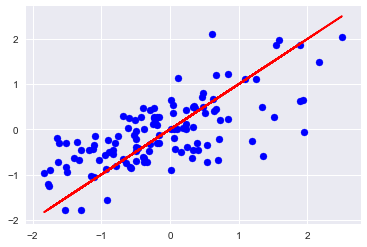

In [108]:
predictions1 = lr2.predict(X2_test_scaled)
plt.plot(y2_test_scaled, y2_test_scaled, c='red')
plt.scatter(y2_test_scaled, predictions, c='blue')
plt.show()

In [109]:
lr2.score(X2_test_scaled, y2_test_scaled)

-0.007336030199633026

Pov v. Marriage
==========

In [110]:
X3 = df['% of Pop 15+ Now Married'].values.reshape(-1, 1)
y3 = df['per_below_pov'].values.reshape(-1, 1)
print("Shape: ", X3.shape, y3.shape)

Shape:  (492, 1) (492, 1)


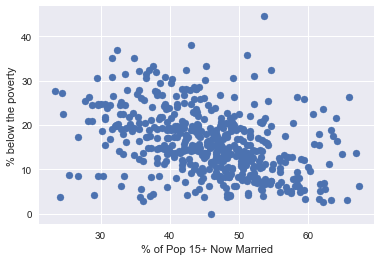

In [111]:
plt.scatter(X3, y3)
plt.xlabel("% of Pop 15+ Now Married")
plt.ylabel("% below the poverty")
plt.show()

In [112]:
lr3 = LinearRegression()
lr3.fit(X3, y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
x3_min = np.array([[X3.min()]])
x3_max = np.array([[X3.max()]])
print(f"Min X Value: {x3_min}")
print(f"Max X Value: {x3_max}")

y3_min = lr3.predict(x3_min)
y3_max = lr3.predict(x3_max)

Min X Value: [[23.4]]
Max X Value: [[67.3]]


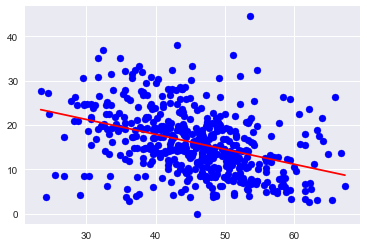

In [117]:
plt.scatter(X3, y3, c='blue')
plt.plot([x3_min[0], x3_max[0]], [y3_min[0], y3_max[0]], c='red')

In [115]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=42)

In [118]:
lr3.score(X3_test, y3_test)

0.2236171493486533

In [119]:
# Use our model to make predictions
predicted = lr3.predict(X3_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y3_test, predicted)
r2 = r2_score(y3_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 37.66820332324495
R-squared (R2 ): 0.2236171493486533


In [121]:
lasso1 = Lasso(alpha=.01).fit(X3_train, y3_train)

predictions = lasso1.predict(X3_test)

MSE = mean_squared_error(y3_test, predictions)
r2 = lasso1.score(X3_test, y3_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 37.82424449895183, R2: 0.22040097012782145


In [122]:
X3_scaler = StandardScaler().fit(X3_train)
y3_scaler = StandardScaler().fit(y3_train)
X3_train_scaled = X3_scaler.transform(X3_train)
X3_test_scaled = X3_scaler.transform(X3_test)
y3_train_scaled = y3_scaler.transform(y3_train)
y3_test_scaled = y3_scaler.transform(y3_test)

In [123]:
lr3_scaled = LinearRegression()
lr3_scaled.fit(X3_train_scaled, y3_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

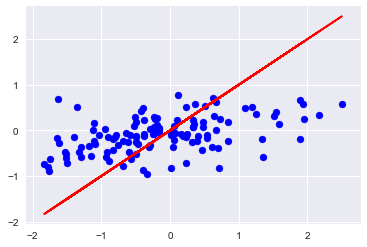

In [124]:
predictions = lr3_scaled.predict(X3_test_scaled)
plt.plot(y3_test_scaled, y3_test_scaled, c='red')
plt.scatter(y3_test_scaled, predictions, c='blue')
plt.show()

In [125]:
lr3_scaled.score(X3_test_scaled, y3_test_scaled)

0.2204275061872457